In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

plt.rc("font", size=28)
plt.rcParams["figure.figsize"] =(12,9)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/Users/harley/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('./data/income.txt', sep=' ', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(50, 2)
['household size', 'income']


In [3]:
data.describe()

,household size,income
count,50.000000,50.000000
mean,2.900000,80367.832540
std,1.092647,43783.205315
min,1.000000,8037.618000
25%,2.000000,48451.214000
50%,3.000000,72895.884500
75%,4.000000,108553.550000
max,5.000000,177808.607000


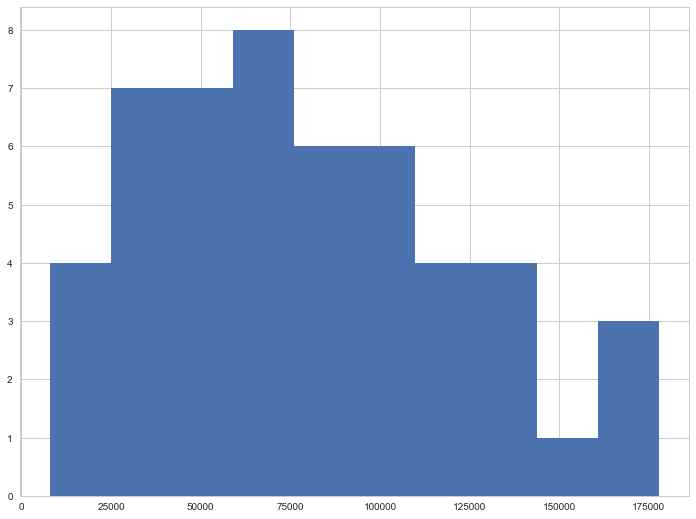

In [4]:
plt.hist(data['income'],10)
plt.show()

the data set called income. This contains two columns the first is the number of adults in a household and the second is the combined income for the household. If we want to estimate the mean income per person we can do this in one of two ways:

In [5]:
np.mean(data['income'] / data['household size'])

29176.939819999992

In [6]:
np.mean(data['income'])/np.mean(data['household size'])

27713.04570344828

In [8]:
s = 100000

est = []
for i in range(s):
    data_sample = data.sample(n=50, replace=True)
    est.append( np.mean(data_sample['income'] / data_sample['household size']) )

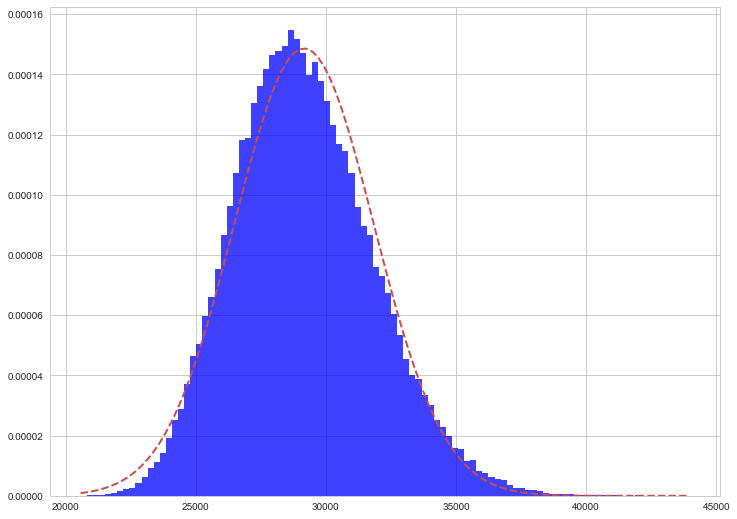

In [9]:
# best fit of data
from scipy.stats import norm
(mu, sigma) = norm.fit(est)

# the histogram of the data
n, bins, patches = plt.hist(est, 100, normed=1, facecolor='blue', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

In [10]:
pd.Series(est).describe()

count    100000.000000
mean      29161.761280
std        2684.003801
min       20579.731595
25%       27270.848982
50%       28982.822393
75%       30879.212846
max       43965.688004
dtype: float64

In [11]:
s = 100000

est_2 = []
for i in range(s):
    data_sample = data.sample(n=50, replace=True)
    est_2.append( np.mean(data_sample['income']) / np.mean(data_sample['household size']) )

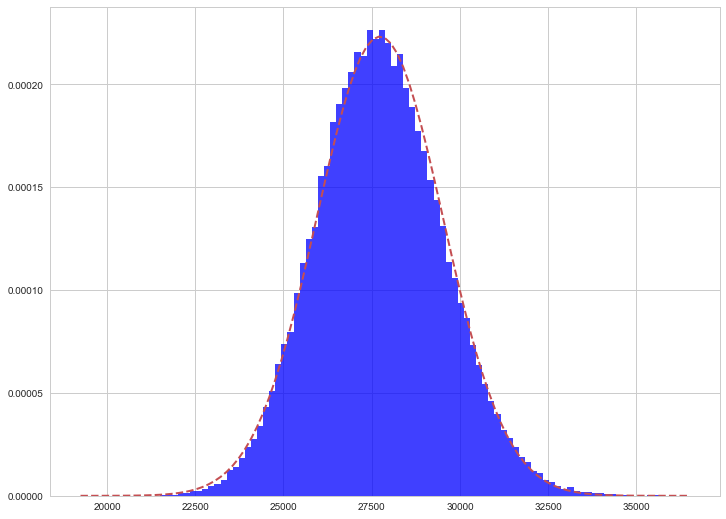

In [12]:
# best fit of data
from scipy.stats import norm
(mu, sigma) = norm.fit(est_2)

# the histogram of the data
n, bins, patches = plt.hist(est_2, 100, normed=1, facecolor='blue', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

In [13]:
pd.Series(est_2).describe()

count    100000.000000
mean      27731.018230
std        1787.056075
min       19247.916834
25%       26504.831542
50%       27692.163024
75%       28911.154195
max       36497.732947
dtype: float64

Generate a single sample of 100 observations from some Normal distribution. Compute $\bar{X}$, the usual estimate of the mean, and compute the standard error in the usual way. Now use a large number of bootstrap samples to estimate the standard error. Compare your two estimates of the variance of $\bar{X}$, and compare these with the theoretical standard error (that is the one you would get if you actually know the value of $\sigma^2$).

In [14]:
N = 100
s = 10000

# sample = np.random.normal(loc=0.0, scale=1.0, size=N)

sample = np.random.exponential(scale=1.0, size=N)

std_err = np.sqrt( 1/N* (1/(N-1)*np.sum(abs(sample - sample.mean())**2)) )

In [15]:
std_err

0.12039319766088709

In [16]:
est_3 = []
data_3 = pd.Series(sample)

for i in range(s):
    data_sample = data_3.sample(n=50, replace=True)
    est_2.append(  )

TypeError: append() takes exactly one argument (0 given)